In [8]:
import sys
import os
sys.path.insert(0, '/Users/lerinalaluf/Desktop/SIP_2021/kaepora/src')
os.chdir('/Users/lerinalaluf/Desktop/SIP_2021/kaepora/src')

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import kaepora as kpora
import numpy as np
import matplotlib.pyplot as plt

In [11]:
spectra_querry = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))"]

In [12]:
spec_array = kpora.grab(spectra_querry[0], verbose=True, db_file = '../data/kaepora_v1_DEV.db')

170 Total Spectra found
170 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1994s sn1994s-19940616-uoi.flm bsnip 56.524322367 0.998840596273 49519.338 0.015177 11.0 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip 225.833313606 -0.728371655089 51056.305 0.013219 14.0 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 173.128497131 0.496750833938 51142.252 0.010567 8.0 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 87.383415757 0.460351148368 51232.237 0.014443 14.0 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip 184.483349779 -0.385339276873 51249.466 0.0095 15.0 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 230.381439474 0.496974506501 51753.396 0.0081 None 3328.0 10316.0
2000dn sn2000dn-20001006-uri-corrected.flm bsnip 31.1030531774 -0.845876955424 51823.327 0.032065 8.0 3250.0 10026.0
2001cp sn2001cp-20010629-ui.flm bsnip 39.9997914207 0.9174473

In [13]:
MIN=1566
MAX=2605

num_cols = len(spec_array)
num_rows = MAX-MIN

grid = [[None]*(num_rows) for z in range(num_cols)]

for x in range(num_cols):
    z=0
    for y in range(MIN, MAX):
        grid[x][z] = spec_array[x].flux[y]
        z+=1   

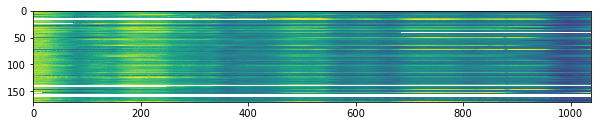

In [15]:
plt.figure(figsize=[10,10])
plt.imshow(grid)